In [1]:
# Packages
import scanpy as sc # package for scRNA-seq data analysis
import numpy as np
import pandas as pd
import os
import scvi

Global seed set to 0


In [2]:
os.chdir('D:/OneDrive - International Campus, Zhejiang University/CAR_T_data') # Change pathway

In [4]:
adata = sc.read('adata_batch.h5ad')

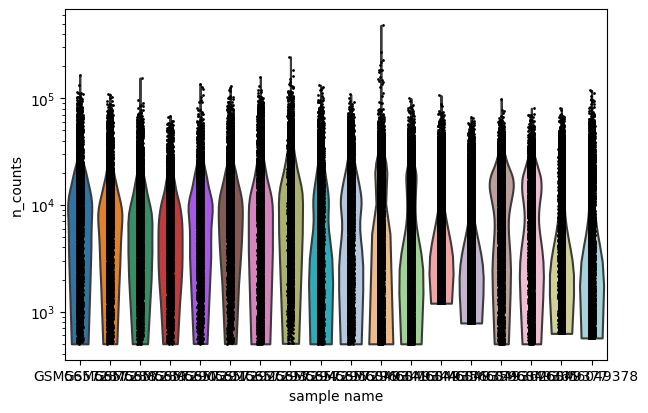

In [5]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

sc.pl.violin(adata, 'n_counts', groupby='sample_name', size=2, log=True, cut=0)

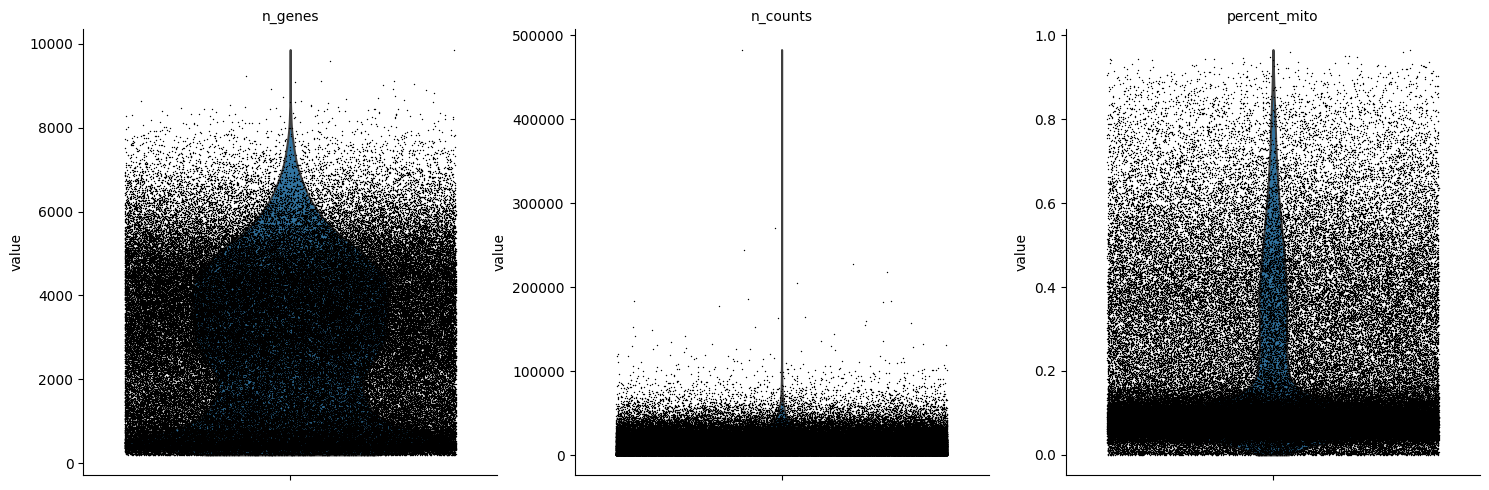

In [6]:
# Quality control - calculate QC covariates
sc.pp.filter_cells(adata, min_genes=200) 
sc.pp.filter_genes(adata, min_cells=3)  # 145738 × 20992

mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.4, multi_panel=True)


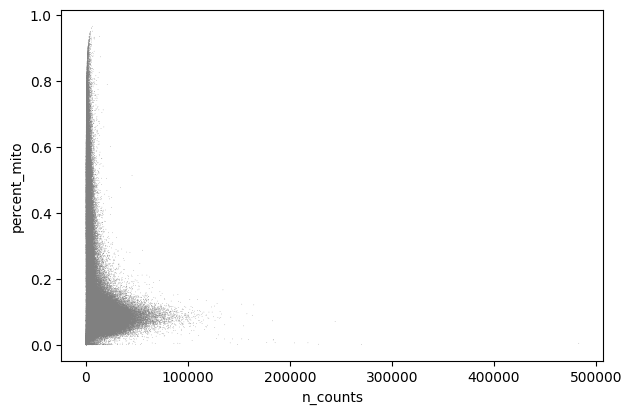

In [7]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')

In [9]:
adata = adata[adata.obs.percent_mito < 0.2, :] # 105862 × 20992

In [11]:
adata = adata[adata.obs.n_genes < 8000, :]
adata = adata[adata.obs.n_genes > 300, :] # 105730 × 20992

In [13]:
adata.write('adata_pp.h5ad')